**Notebook credit**: based on the F. Chollet's original notebook [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb).

## A 10 class classification problem


- We will classify grayscale images of handwritten digits (28 × 28 pixels) into 10 categories (0 through 9)
- We’ll use the MNIST dataset, a classic in the machine learning community
- Has 60,000 training images, plus 10,000 test images
- Was assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s
- You can think of working with MNIST as the “Hello World” of deep learning

**Loading the MNIST dataset in Keras**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The MNIST dataset comes preloaded in Keras in four NumPy
arrays.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- `train_images` and `train_labels` form the *training set*, the data that the model will learn from
- model will then be tested on the *test set*, `test_images` and `test_labels`
- images are encoded as NumPy arrays
- labels are an array of digits, ranging from 0 to 9.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Workflow** will be as follows:
- we’ll feed the neural network the training data, `train_images` and `train_labels`
- network will then learn to associate images and labels
- we’ll ask the network to produce predictions for `test_images`
- we’ll verify whether these predictions match the labels from `test_labels`

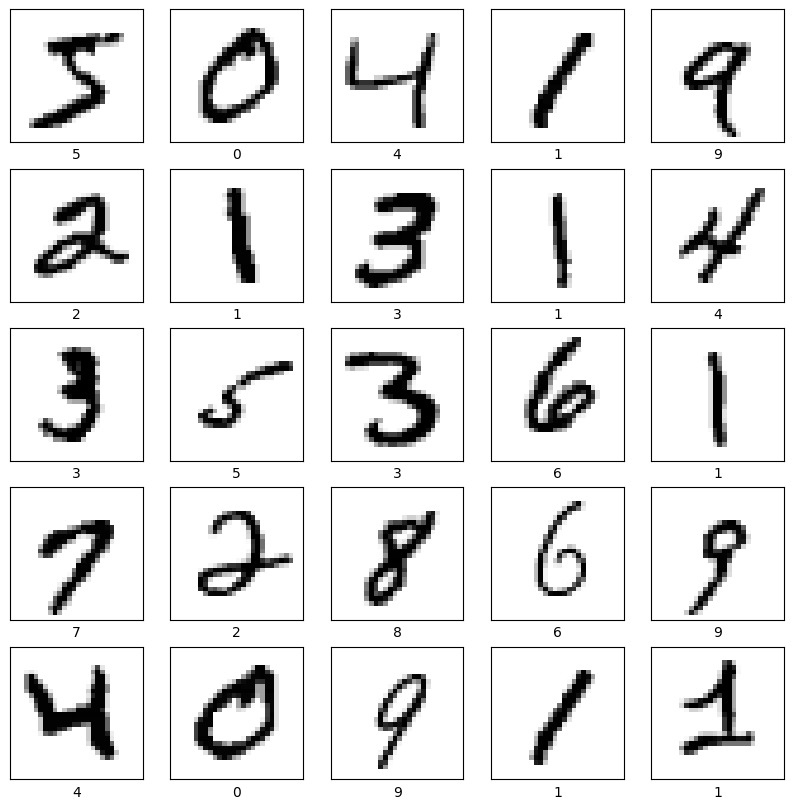

In [ ]:
# Don't worry about the details of the plotting commands below. You won't be tested on this stuff.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

**The network architecture**

- core building block of neural networks is the *layer*
- data goes into a layer, and it comes out in a more useful form
- layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand
- most deep learning consists of chaining together simple layers



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Our model consists of:

- a layer that simply reshapes the input (therefore has no parameters)
- followed by a sequence of two `Dense` layers
- these are densely connected (also called *fully connected*) neural layers
- the last layer is a 10-way softmax classification layer
  - it will return an array of 10 probability scores (summing to 1)
  - each score will be the probability that the current digit image belongs to one of our 10 digit classes

Let's look at our model's summary. Can you compute the number of trainable parameters in each layer yourself?

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**The compilation step**

This step involves choosing:
- An *optimizer*—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance
- A *loss function*—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
-*Metrics to monitor during training and testing*—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

- we’ll preprocess the data by scaling it so that all values are in the [0, 1] interval
- previously, our training images were stored in an array of shape (60000, 28, 28) of type `uint8` with values in the [0, 255] interval
- we’ll transform it into a `float64` array of shape (60000, 28, 28) with values between 0 and 1.

In [ ]:
print(f"previously, train_images was of type {train_images.dtype}")
train_images = train_images / 255
test_images = test_images / 255
print(f"now, train_images is of type {train_images.dtype}")

previously, train_images was of type uint8
now, train_images is of type float64


**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2675 - accuracy: 0.9226
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1081 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0714 - accuracy: 0.9783
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0517 - accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0384 - accuracy: 0.9887



- Two quantities are displayed during training:
  - the loss of the model over the training data
  - the accuracy of the model over the training data
- We quickly reach an accuracy of 0.989 (98.9%) on the training data.

**Using the model to make predictions**

We can use out trained model to predict class probabilities for new digits—images in the test set (these were _not_ part of the training set)

In [ ]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([3.1796873e-08, 3.4995540e-10, 5.6380577e-06, 3.3159151e-05,
       6.9945668e-12, 1.0093539e-08, 4.9086527e-13, 9.9996084e-01,
       8.0281382e-09, 1.7157339e-07], dtype=float32)

In [ ]:
print(predictions.shape)

(10000, 10)


- Each number of index `i` in that array corresponds to the probability that digit image test_digits[0] belongs to class `i`.
- This first test digit has the highest probability score (almost 1) at index 7, so according to our model, it must be a 7

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99996084

Our prediction agrees with the true test label.

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

Let's compute average accuracy over the entire test set.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9786
test_acc: 0.978600025177002


- test-set accuracy turns out to be around 98%
- that's a bit lower than the training-set accuracy (98.9%)
- gap between training accuracy and test accuracy is an example of *overfitting*:
  - ML models tend to perform worse on new data than on their training data
  - We will talk more about overfitting later in this course

**Visualizing first few predictions and first few mistakes**

_Note: this section is for visualization purposes only. You will not be tested on this stuff_

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

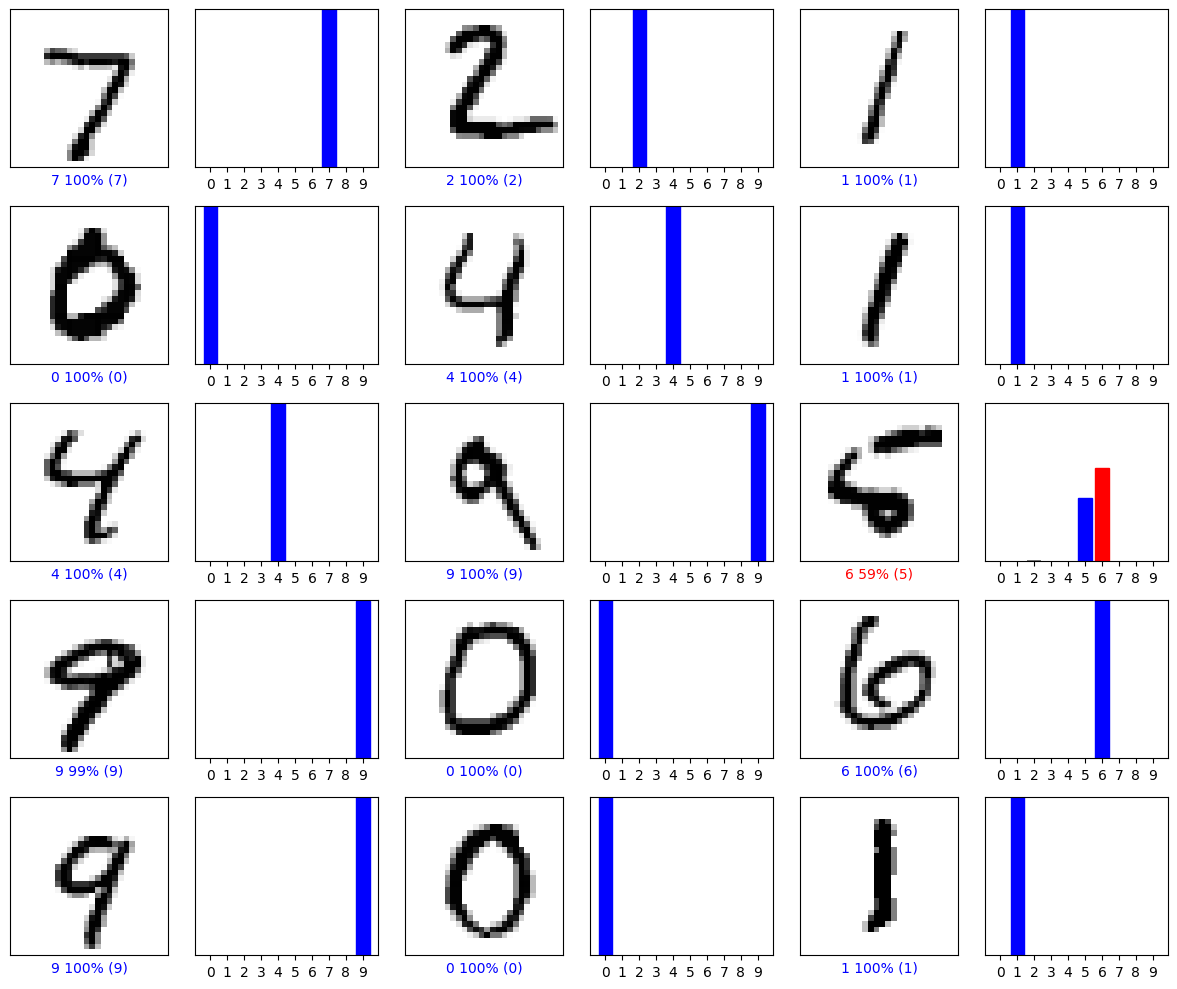

In [ ]:
# plot first few predictions

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

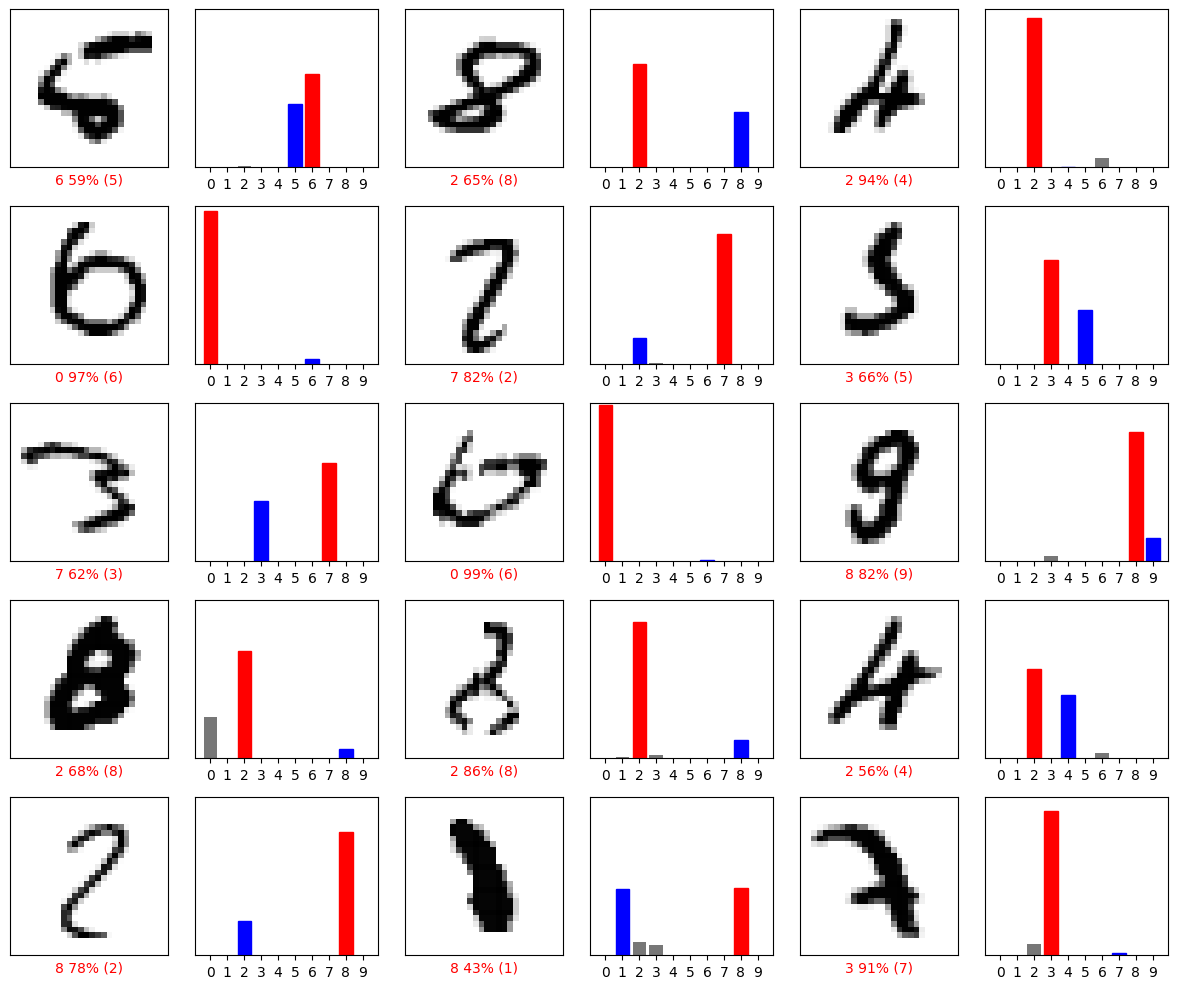

In [ ]:
# plot first few mistakes

num_rows = 5
num_cols = 3
i, mistakes = 0, 0
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
while mistakes < num_rows*num_cols:
  if predictions[i].argmax() != test_labels[i]: # plot only if prediction incorrect
    plt.subplot(num_rows, 2*num_cols, 2*mistakes+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*mistakes+2)
    plot_value_array(i, predictions[i], test_labels)
    mistakes += 1
  i = i + 1
plt.tight_layout()
plt.show()

**Training a single layer network and visualizing network weights**

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5991 - accuracy: 0.8503
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.9074
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3045 - accuracy: 0.9157
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2909 - accuracy: 0.9183
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.9211
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2774 - accuracy: 0.9230
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2700 - accuracy: 0.9256
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9263
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.9268

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 1ms/step - loss: 0.2658 - accuracy: 0.9265
test_acc: 0.9265000224113464


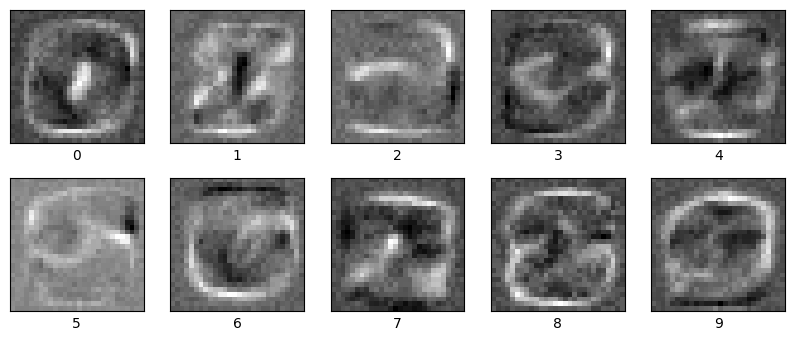

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
  w = model.layers[1].get_weights()[0][:,i].reshape([28, 28])
  plt.subplot(2,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(w, cmap=plt.cm.binary) # larger values get darker shade
  plt.xlabel(i)
plt.show()

**Finding the training images that maximize the activation of outputs (before softmax)**

In [ ]:
reshaped_images = train_images.reshape([60000, 784])
reshaped_images.shape # now in a shape that is compatible with multiplication with a 784 dim vector of weights

(60000, 784)

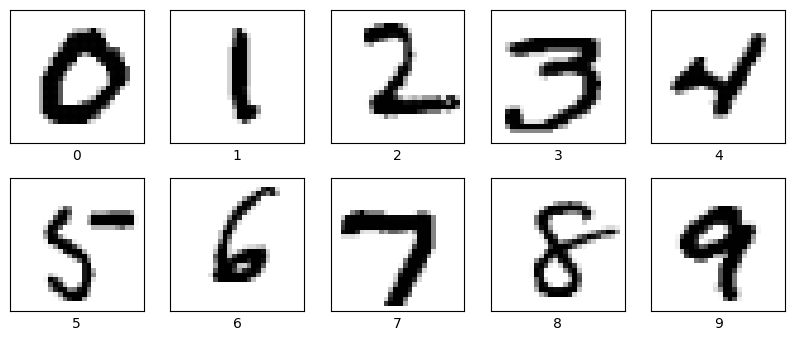

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
  w = model.layers[1].get_weights()[0][:,i]     # weight for digit i
  image_id = np.argmax(reshaped_images.dot(w))  # compute dot product with 60,000 images and find the image with maximum dot product
  plt.subplot(2,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[image_id], cmap=plt.cm.binary) # larger values get darker shade
  plt.xlabel(i)
plt.show()